This notebook demonstrates the pipeline for running site response simulations in batch. You can choose to run the simulations using multiple CPU processors.

In [1]:
from PySeismoSoil.class_ground_motion import Ground_Motion
from PySeismoSoil.class_Vs_profile import Vs_Profile
from PySeismoSoil.class_curves import Multiple_GGmax_Damping_Curves
from PySeismoSoil.class_parameters import HH_Param_Multi_Layer
from PySeismoSoil.class_simulation import Linear_Simulation, Equiv_Linear_Simulation, Nonlinear_Simulation
from PySeismoSoil.class_batch_simulation import Batch_Simulation

# 1. Linear simulations in batch

In [2]:
accel_in = Ground_Motion('../tests/files/sample_accel.txt', unit='gal')
profile_1 = Vs_Profile('../tests/files/profile_FKSH14.txt')
profile_2 = Vs_Profile('../tests/files/profile_P001.txt')

In [3]:
lin_sim_1 = Linear_Simulation(profile_1, accel_in, boundary='rigid')
lin_sim_2 = Linear_Simulation(profile_2, accel_in, boundary='elastic')

In [4]:
batch_lin_sim = Batch_Simulation([lin_sim_1, lin_sim_2])

Parallel computing in progress... done.
Linear site response simulation running... done.
Linear site response simulation running... done.


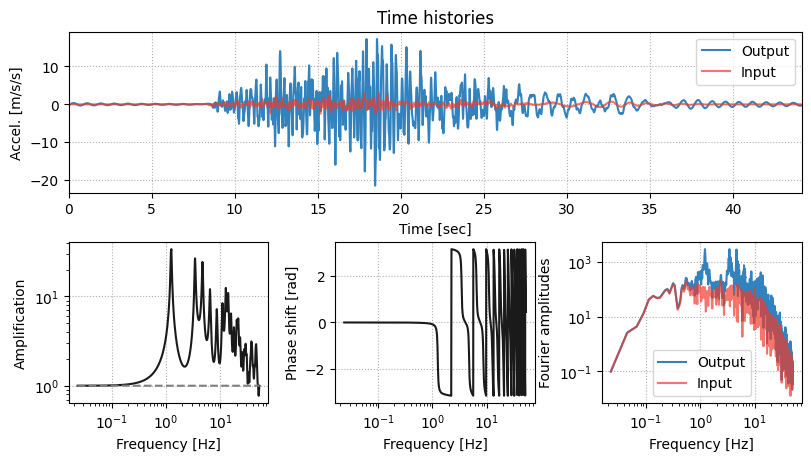

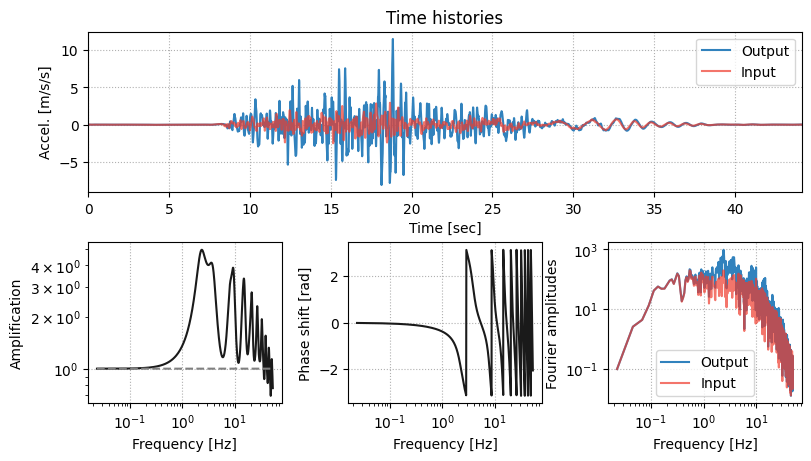

In [5]:
lin_results = batch_lin_sim.run(parallel=True, n_cores=2, options=dict(every_layer=False, show_fig=True))

In [6]:
lin_results

# 2. Equivalent linear simulations in batch

In [7]:
curves_1 = Multiple_GGmax_Damping_Curves(data='../tests/files/curve_FKSH14.txt')
curves_2 = Multiple_GGmax_Damping_Curves(data='../tests/files/curve_P001.txt')

(To see how to construct $G/G_{\max}$ and damping curves from $V_S$ profiles, go to [this notebook](./Pipeline_04_Equivalent_Linear_Method.ipynb).)

In [8]:
equiv_sim_1 = Equiv_Linear_Simulation(profile_1, accel_in, curves_1, boundary='elastic')
equiv_sim_2 = Equiv_Linear_Simulation(profile_2, accel_in, curves_2, boundary='elastic')

In [9]:
batch_equiv_sim = Batch_Simulation([equiv_sim_1, equiv_sim_2])

In [10]:
equiv_results = batch_equiv_sim.run(parallel=True, n_cores=2, options=dict(verbose=True, show_fig=False));

Parallel computing in progress... done.
Iteration No.1.  G_diff =  266.66%, D_diff =   87.87%
Iteration No.2.  G_diff =   20.34%, D_diff =   61.21%
Iteration No.3.  G_diff =    5.78%, D_diff =  157.80%
Iteration No.4.  G_diff =    1.74%, D_diff =    1.42%
---------- Convergence achieved ---------------
Iteration No.1.  G_diff =  251.72%, D_diff =   86.55%
Iteration No.2.  G_diff =   76.29%, D_diff =   20.03%
Iteration No.3.  G_diff =   30.13%, D_diff =    6.62%
Iteration No.4.  G_diff =   20.04%, D_diff =    5.24%
Iteration No.5.  G_diff =   23.14%, D_diff =    5.47%
Iteration No.6.  G_diff =   38.53%, D_diff =    3.50%
Iteration No.7.  G_diff =   13.29%, D_diff =    1.69%
Iteration No.8.  G_diff =    6.84%, D_diff =    1.39%
---------- Convergence achieved ---------------


In [11]:
equiv_results

# 3. Nonlinear simulations in batch

In [12]:
hh_g_param_1 = HH_Param_Multi_Layer('../tests/files/HH_G_FKSH14.txt')
hh_g_param_2 = HH_Param_Multi_Layer('../tests/files/HH_G_P001.txt')

In [13]:
hh_x_param_1 = HH_Param_Multi_Layer('../tests/files/HH_X_FKSH14.txt')
hh_x_param_2 = HH_Param_Multi_Layer('../tests/files/HH_X_P001.txt')

(To see how to construct HH parameters for $G/G_{\max}$ and damping behaviors, go to [this notebook](./Pipeline_05_Nonlinear_Method.ipynb).)

In [14]:
nonl_sim_1 = Nonlinear_Simulation(profile_1, accel_in, G_param=hh_g_param_1, xi_param=hh_x_param_1, boundary='elastic')
nonl_sim_2 = Nonlinear_Simulation(profile_2, accel_in, G_param=hh_g_param_2, xi_param=hh_x_param_2, boundary='rigid')

In [15]:
batch_nonl_sim = Batch_Simulation([nonl_sim_1, nonl_sim_2])

In [16]:
nonl_results = batch_nonl_sim.run(
    parallel=True, n_cores=2, options=dict(remove_sim_dir=True, verbose=True, show_fig=False),
)

Parallel computing in progress... |---------------- Calculating --------------------|
||---------------- Calculating --------------------|
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||| 
 
Calculation finished. Writing results to disk...
 
|||||||||||||||| 
 
Calculation finished. Writing results to disk...
 
done.
Nonlinear simulation running...
Simulation finished. Now post processing.
Done.
`sim_dir` (./batch_sim_2023-01-08_16-37-35/1) removed.
Nonlinear simulation running...
Simulation finished. Now post processing.
Done.
`sim_dir` (./batch_sim_2023-01-08_16-37-35/0) removed.


In [17]:
nonl_results

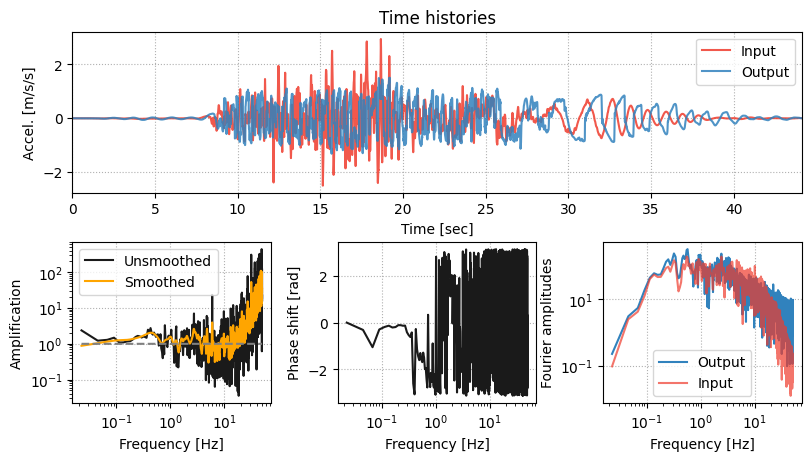

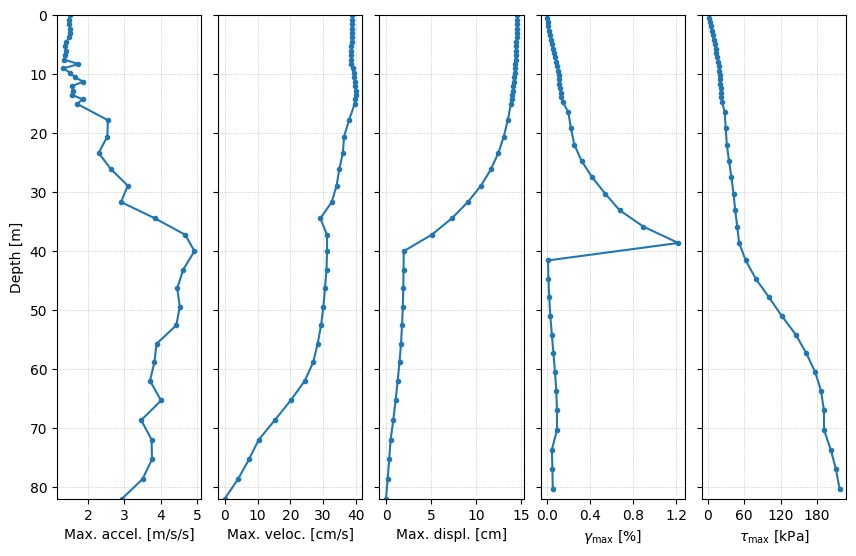

In [18]:
nonl_results[1].plot();